## Estimating Avocado sales using machine learning

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
#warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

# Model Evaluations
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
# Load data
df = pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [3]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(16468, 14)

In [5]:
df.isna().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(1517, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
Unnamed: 0      1517 non-null float64
Date            1517 non-null object
AveragePrice    1517 non-null float64
Total Volume    1517 non-null float64
4046            1517 non-null float64
4225            1517 non-null float64
4770            1517 non-null float64
Total Bags      1517 non-null float64
Small Bags      1517 non-null float64
Large Bags      1517 non-null float64
XLarge Bags     1517 non-null float64
type            1517 non-null object
year            1517 non-null float64
region          1517 non-null object
dtypes: float64(11), object(3)
memory usage: 177.8+ KB


In [9]:
# Lets remove Unnamed column which is similar to serial number
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [10]:
# Check for unique data
df.type.unique()

array(['conventional'], dtype=object)

In [11]:
# We can remove type column since it has only one unique value
df.drop(['type'],axis=1,inplace=True)

In [12]:
# check for uniqueness in region column
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [13]:
# Here we can remove Date column since this is not useful to predict output 
df.drop(['Date'],axis=1,inplace=True)

In [14]:
df.shape

(1517, 11)

In [15]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,Albany


In [16]:
# Convert the region Column to number
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
le=LabelEncoder()
region_data = le.fit_transform(df['region'])
region_data

array([0, 0, 0, ..., 7, 7, 7])

In [17]:
df['region'] = region_data
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015.0,0


In [18]:
df.region.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [19]:
df.shape

(1517, 11)

In [20]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region            int32
dtype: object

In [21]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,21.196440
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,16.132398
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,0.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,6.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,19.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,35.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,50.000000


In [22]:
# Lets check correlation matrix
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,-0.229408
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,0.236579
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,0.269481
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,0.215733
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,0.138092
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,0.190001
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,0.168650
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,0.297452
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,-0.046144
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.470472


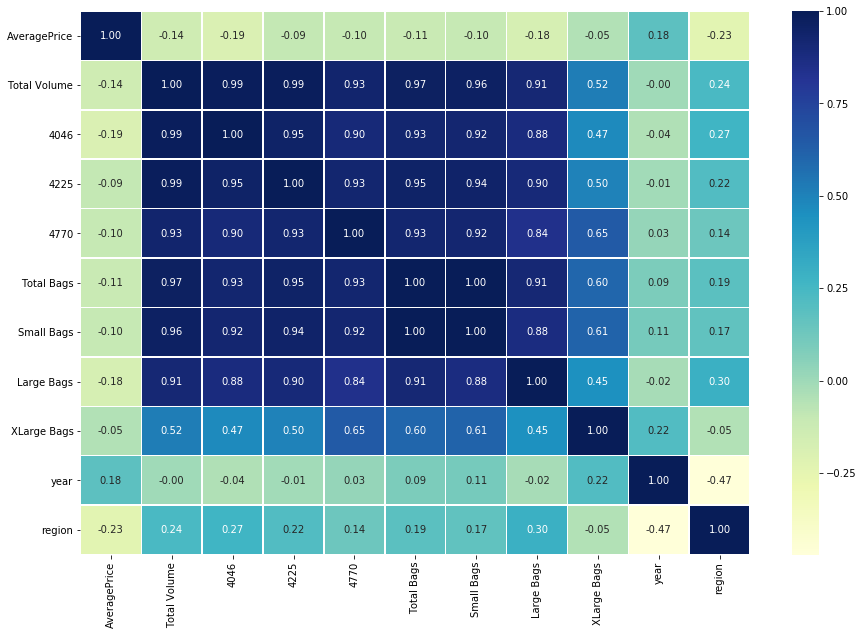

In [23]:
# Let's plot the correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");


In [24]:
# Lets check for skewness 
df.skew()
# There is some skewness which we need to be treated. If value is 0.55 or more then there would be a skewed value

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [25]:
#Treating the skewness using log
import numpy as np
for col in df.columns:
#Here complete column name has been passed
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [26]:
df.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
region          0.288146
dtype: float64

In [27]:
#Lets check for outliers
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)
df_final=df.loc[(z_score<3).all(axis=1)]
print(df_final.shape)

(1517, 11)
(1502, 11)


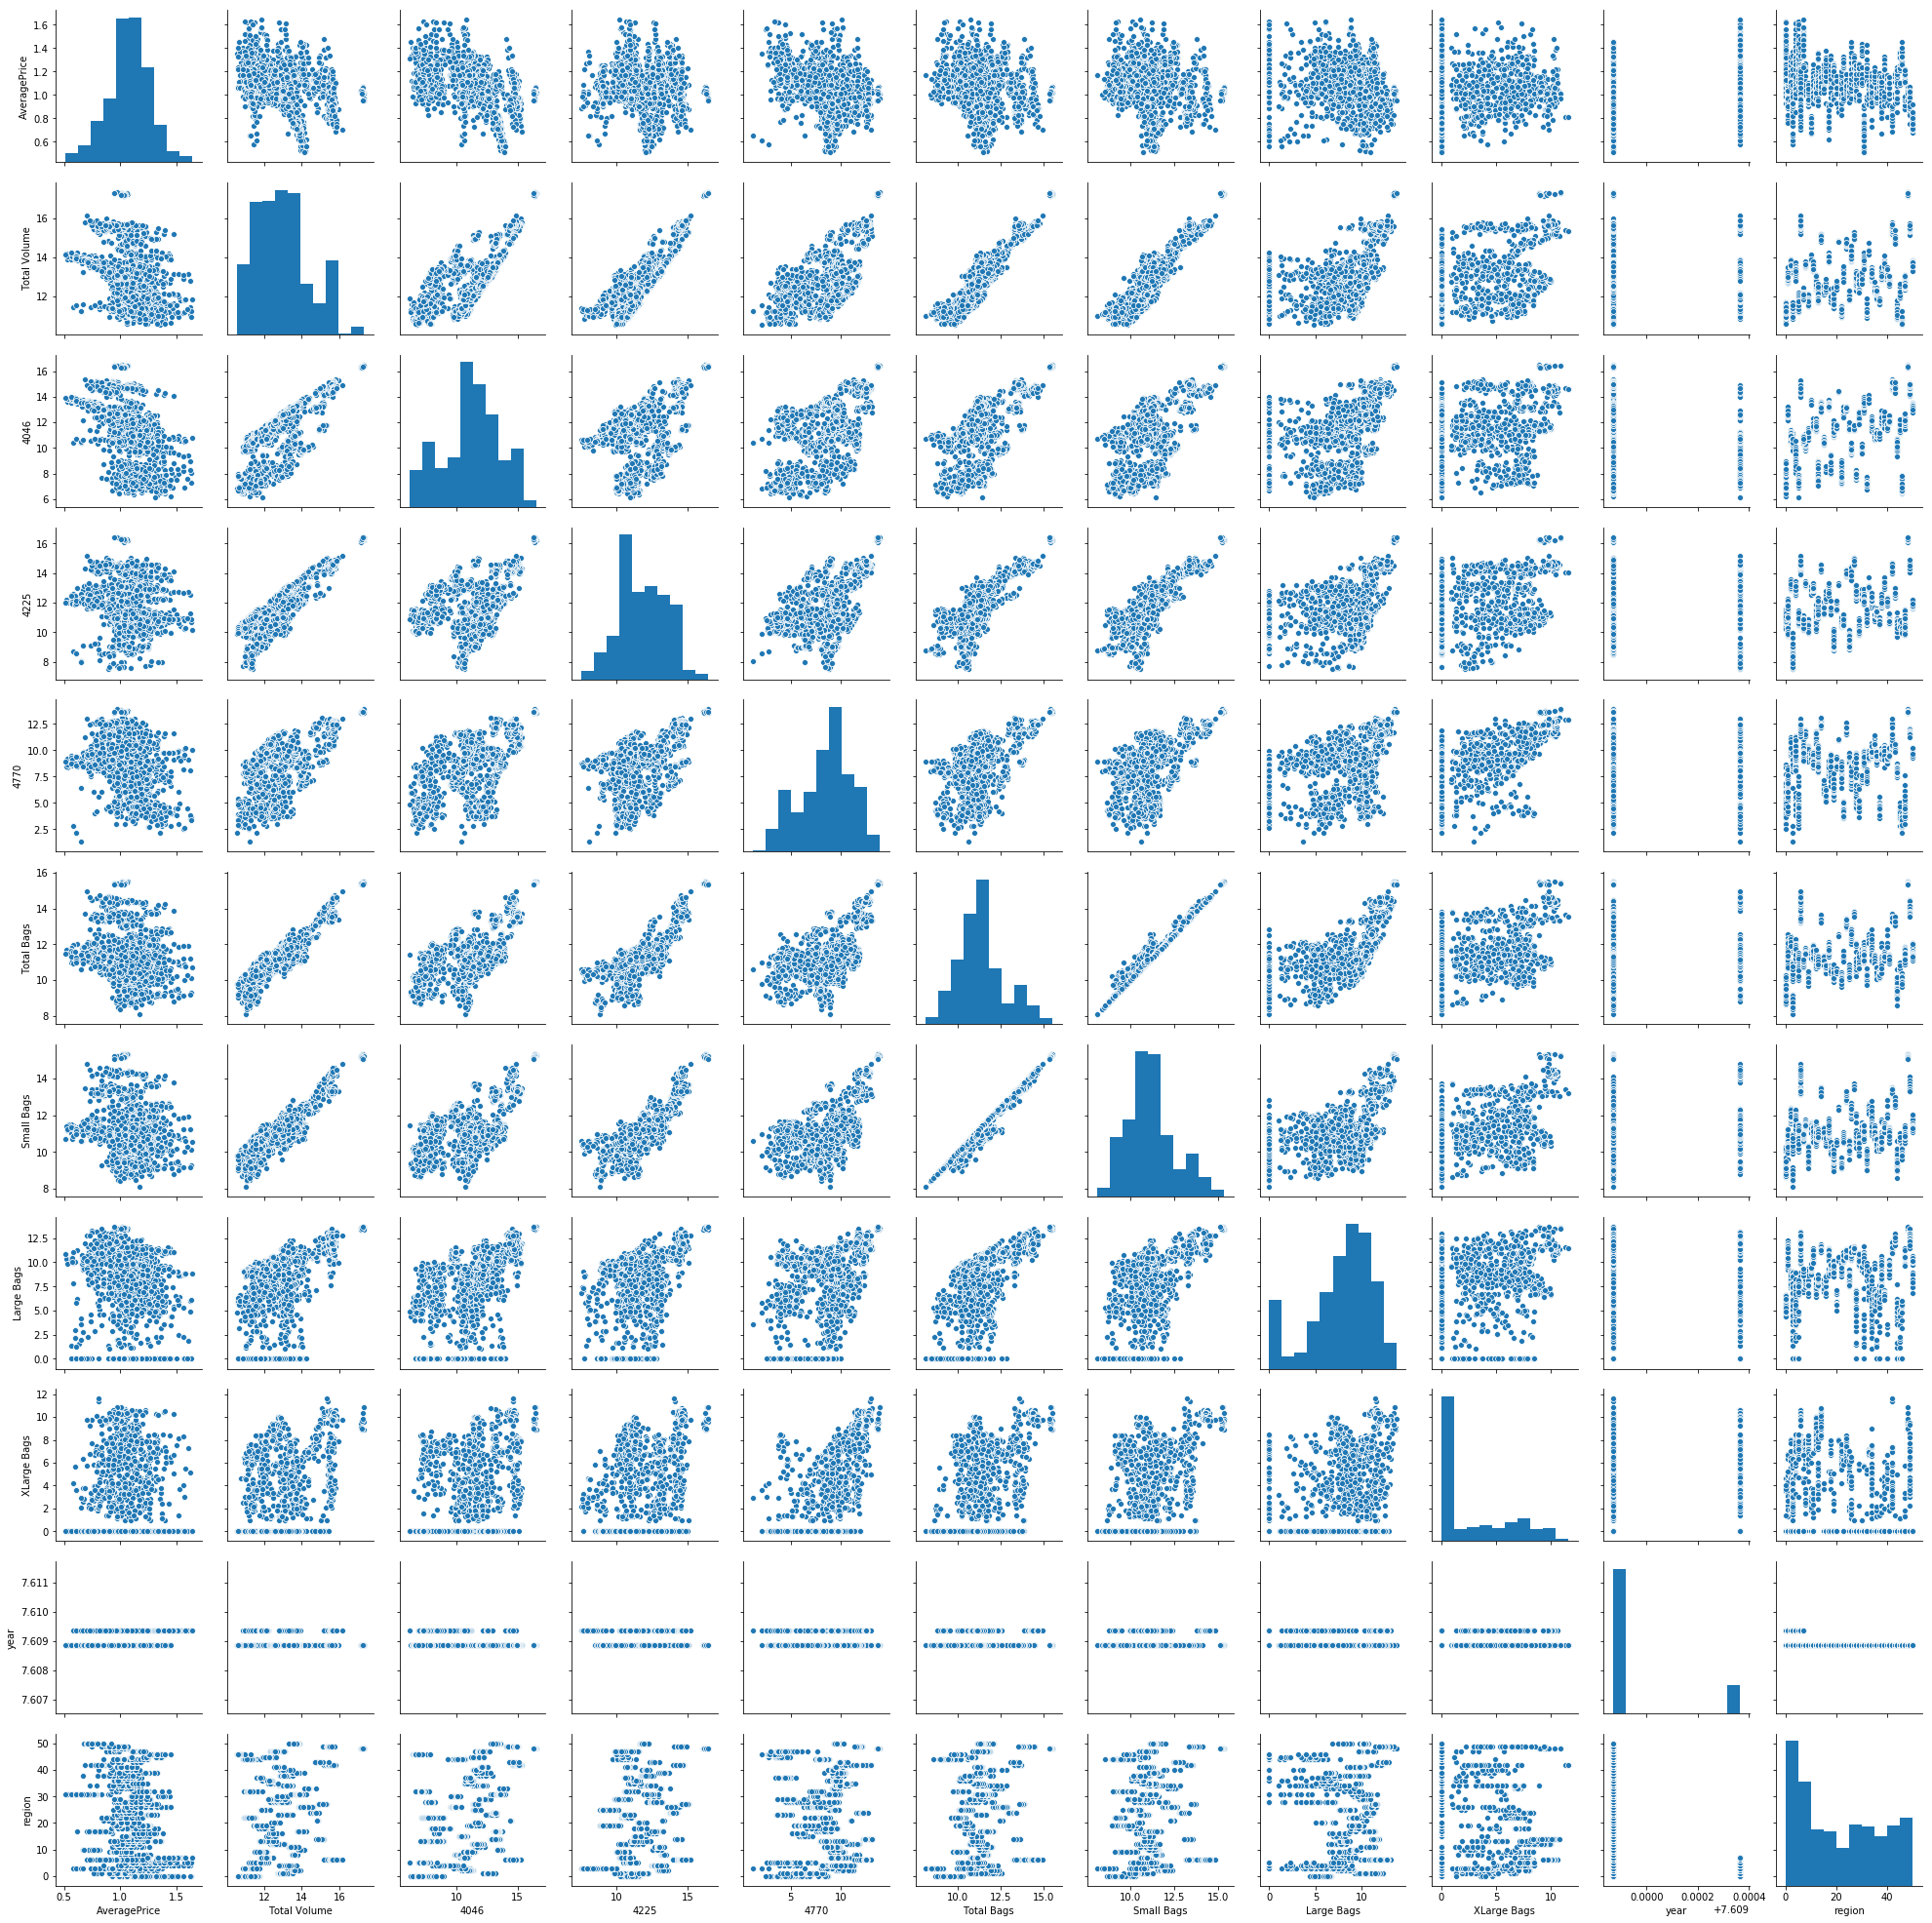

In [28]:
#Lets Check the pairplot using seaborn Library
import seaborn as sns
sns.pairplot(df_final)
plt.show()

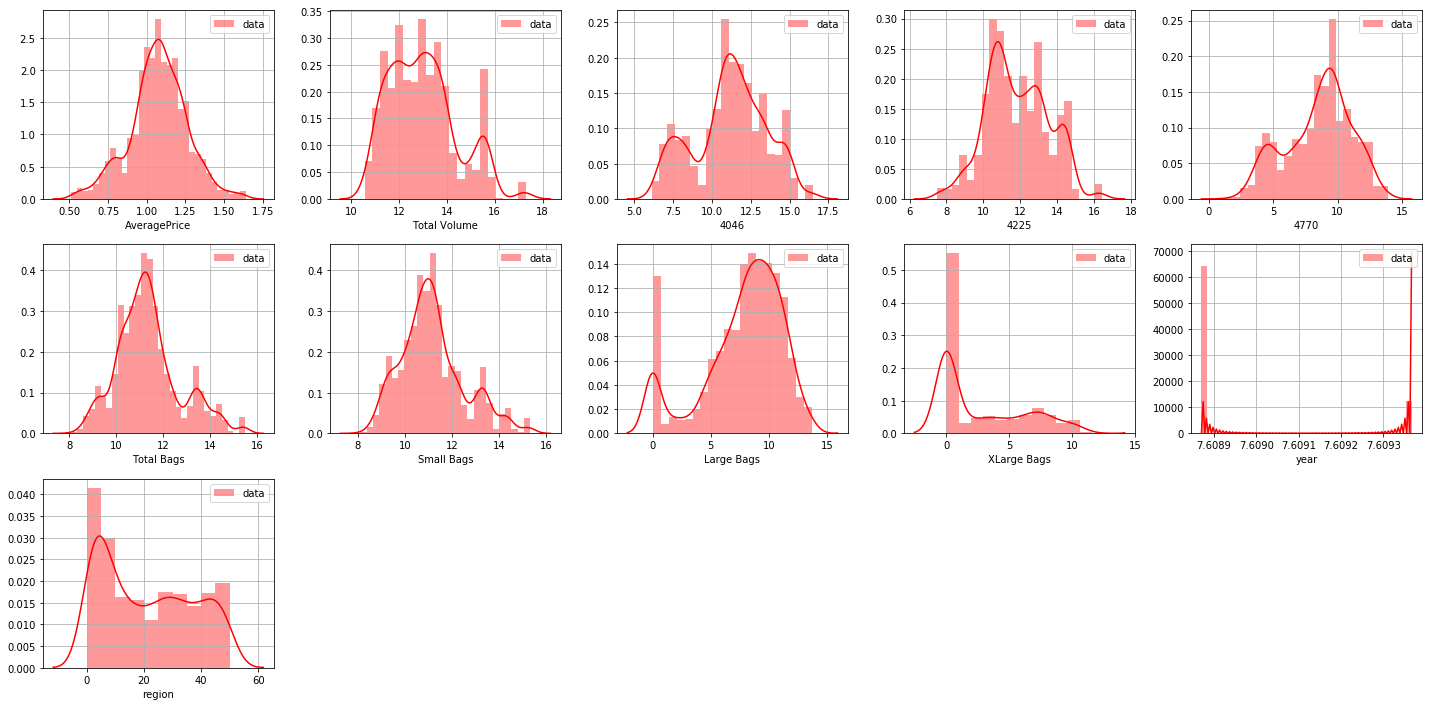

In [29]:
plt.figure(figsize=(20,16))
for i,col in enumerate(list(df_final.columns.values)):
    plt.subplot(5,5,i+1)
    sns.distplot(df_final[col],color='r',kde=True,label='data')
    plt.grid()
    plt.legend(loc='upper right')
    plt.tight_layout()

In [30]:
# Lets start modelling
# Split data into X and y
X = df_final.drop("AveragePrice", axis=1)
y = df_final["AveragePrice"]

In [31]:
X.shape, y.shape

((1502, 10), (1502,))

In [32]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [33]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1201, 10), (1201,), (301, 10), (301,))

### Linear Regression

In [34]:
linearmodel = LinearRegression()
linearmodel.fit(X_train, y_train)
linearmodel.score(X_train,y_train)

0.38363858833314357

In [35]:
#predict the value
pred=linearmodel.predict(X_test)
print('Mean absolute error:',mean_absolute_error(y_test, pred))
print('Mean sqaured error:',mean_squared_error(y_test, pred))

print('Root mean squared error:',np.sqrt(mean_squared_error(y_test, pred)))
print('R2 Score of lg: %.2f' % r2_score(y_test, pred))

Mean absolute error: 0.11016109086982218
Mean sqaured error: 0.018928189539721512
Root mean squared error: 0.13757975701287423
R2 Score of lg: 0.44


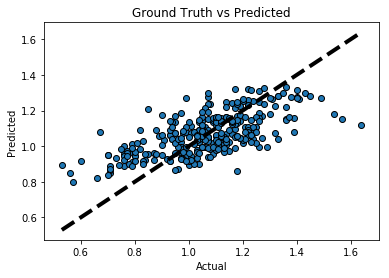

In [36]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Boost through GradientBoostRegressor By using Parameters

In [37]:
from sklearn import ensemble
# Fit regression model
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
modelgbr = ensemble.GradientBoostingRegressor(**params)

modelgbr.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, n_estimators=500)

In [38]:
model_score = modelgbr.score(X_train,y_train)
print("model_Score:",model_score)

y_predictedgbr = modelgbr.predict(X_test)

print("Mean squared error: %.2f"% mean_squared_error(y_test, y_predictedgbr))
# Explained variance score: 1 is perfect prediction
print('R2 Score: %.2f' % r2_score(y_test, y_predictedgbr))

model_Score: 0.8477843044468215
Mean squared error: 0.01
R2 Score: 0.74


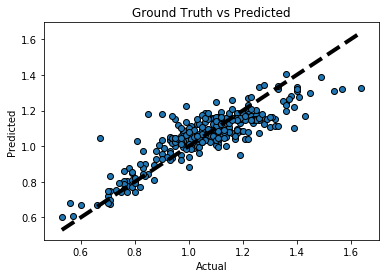

In [39]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, y_predictedgbr, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

### KNN Model

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_model.score(X_train, y_train)
predicted=knn_model.predict(X_test)
print("Mean squared error of knn: %.2f"% mean_squared_error(y_test, predicted))
print('R2 Score of knn: %.2f' % r2_score(y_test, predicted))

Mean squared error of knn: 0.01
R2 Score of knn: 0.78


In [41]:
#Lets use the Grid Search to Find the Optimal Value of n_neighbors in Knn Model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import NearestNeighbors
neighbors={"n_neighbors":range(1,20)}
knr = KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(X, y)
gknr.best_params_

{'n_neighbors': 11}

In [42]:
def maxr2_score(regr,X,Y):
    max_r_score=0
    for r_state in range(42, 100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state = r_state)
        regr.fit(X_train,y_train)
        y_pred = regr.predict(X_test)
        r2_scr = r2_score(y_test, y_pred)
        print("r2 score corresponding to " ,r_state, "is", r2_scr)
        if r2_scr > max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print(" ")
    print("max r2 score corresponding to ", final_r_state, "is",max_r_score)
    return final_r_state

In [43]:
#Lets Use Knn Regression and Check max r2 score corresponding to different random states
knr = KNeighborsRegressor(n_neighbors = 11)
r_state = maxr2_score(knr,X,y)

r2 score corresponding to  42 is 0.7207646432590065
r2 score corresponding to  43 is 0.6773798160364293
r2 score corresponding to  44 is 0.6218427715136003
r2 score corresponding to  45 is 0.6295487038434449
r2 score corresponding to  46 is 0.7212244486918655
r2 score corresponding to  47 is 0.7044847107887409
r2 score corresponding to  48 is 0.677059009767953
r2 score corresponding to  49 is 0.7003253932486515
r2 score corresponding to  50 is 0.6907957497597618
r2 score corresponding to  51 is 0.6960207561559624
r2 score corresponding to  52 is 0.6876211690123885
r2 score corresponding to  53 is 0.6871282283572238
r2 score corresponding to  54 is 0.7212838912890921
r2 score corresponding to  55 is 0.7083189600000122
r2 score corresponding to  56 is 0.6497513769308645
r2 score corresponding to  57 is 0.656233267604774
r2 score corresponding to  58 is 0.6973125659947728
r2 score corresponding to  59 is 0.6321959378873424
r2 score corresponding to  60 is 0.7184588637212248
r2 score corre

In [44]:
#Lets check the mean r2 score of both linear regression model and knn regression 
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression:",cross_val_score(linearmodel, X, y, cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Linear Regression:",cross_val_score(linearmodel, X, y, cv=5, scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knn_model, X, y,cv=5,scoring="r2").mean())
print("Stadard deviation in r2 score for KNN Regression:",cross_val_score(knn_model, X, y, cv=5, scoring="r2").std())

Mean r2 score for Linear Regression: 0.1305319353180408
Standard deviation in r2 score for Linear Regression: 0.20497060573796108

Mean r2 score for KNN Regression:  -0.6756645040943765
Stadard deviation in r2 score for KNN Regression: 0.8862412054325147


#### Boosting Linear Regression

In [45]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg1=AdaBoostRegressor()
add_reg1=AdaBoostRegressor(base_estimator=linearmodel, learning_rate=0.1, n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg1, X, y, cv=5, scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg1, X, y, cv=5, scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2516800508919612
Standard deviation in r2 score for ada boosting Regression:  0.1307872160614351


#### Boosting KNN model

In [46]:
from sklearn.ensemble import AdaBoostRegressor
ada_reg2=AdaBoostRegressor()
add_reg2=AdaBoostRegressor(base_estimator=knn_model, learning_rate=0.1, n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg2, X, y, cv=5, scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg2,X, y, cv=5, scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.1829441275916754
Standard deviation in r2 score for ada boosting Regression:  0.10347572469870192


#### lasso regression

In [47]:
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(X, y)
clf.best_params_

{'alpha': 0.001}

In [48]:
#Lets use cross val score with Lasso
lasso_grs = Lasso(alpha = 0.01)
print("Mean r2 score for Lasso Regression: ",cross_val_score(lasso_grs, X, y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for Lasso Regression: ",cross_val_score(lasso_grs, X, y, cv=5, scoring="r2").std())

Mean r2 score for Lasso Regression:  0.09361545972683034
Standard deviation in r2 score for Lasso Regression:  0.12182795270610124


#### Boosting Lasso Regressor

In [49]:
ada_reg3=AdaBoostRegressor()
add_reg3=AdaBoostRegressor(base_estimator=lasso_grs, learning_rate=0.1, n_estimators=10)
print("Mean r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,y,cv=5,scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression: ",cross_val_score(ada_reg3,X,y,cv=5,scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.2111125484264101
Standard deviation in r2 score for ada boosting Regression:  0.06570559399596515


### Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor
rfregressor = RandomForestRegressor()
rfregressor.fit(X_train, y_train)
y_pred5 = rfregressor.predict(X_test)
print("Mean squared error ofRandom forest: %.2f"% mean_squared_error(y_test, y_pred5))
print('R2 Score : %.2f' % r2_score(y_test, y_pred5))


Mean squared error ofRandom forest: 0.01
R2 Score : 0.83


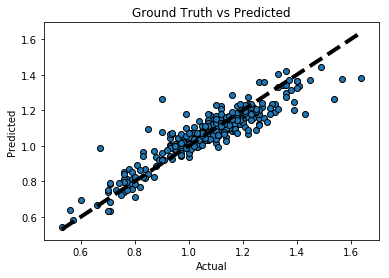

In [51]:
# Lets Visualize the Goodness of the Prediction
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred5, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

#### Random Forest Regressor with GridSearchCV

In [52]:
from sklearn.model_selection import RandomizedSearchCV
rf_gs = RandomForestRegressor(n_estimators=10)
n_features = X.shape[1]

grid = RandomizedSearchCV(rf_gs, n_iter=20, 
            param_distributions=dict(
                                          max_depth=np.arange(5,20+1), 
                                          max_features=np.arange(1, n_features+1)
                                    )
         )
grid.fit(X, y)
print(grid.best_params_)

{'max_features': 1, 'max_depth': 6}


In [57]:
rf_gss = RandomForestRegressor(max_features = 1, max_depth = 6)
rf_gss.fit(X_train, y_train)
y_pred10 = rf_gss.predict(X_test)
print("Mean squared error ofRandom forest: %.2f"% mean_squared_error(y_test, y_pred10))
print('R2 Score : %.2f' % r2_score(y_test, y_pred10))
print("Mean r2 score:  %.2f"% cross_val_score(rf_gss, X, y, cv=5, scoring="r2").mean())
print("Standard deviation in r2 score:  %.2f"% cross_val_score(rf_gss, X, y, cv=5, scoring="r2").std())

Mean squared error ofRandom forest: 0.01
R2 Score : 0.69
Mean r2 score:  0.28
Standard deviation in r2 score:  0.13


#### Boosting RandomForestRegressor

In [58]:
ada_reg6 = AdaBoostRegressor()
add_reg6 = AdaBoostRegressor(base_estimator=rfregressor,learning_rate=0.1,n_estimators=10)
print("Mean r2 score for ada boosting Regression:  %.2f"% cross_val_score(add_reg6, X, y, cv=5, scoring="r2").mean())
print("Standard deviation in r2 score for ada boosting Regression:  %.2f"%cross_val_score(add_reg6, X, y, cv=5, scoring="r2").std())

Mean r2 score for ada boosting Regression:  0.16
Standard deviation in r2 score for ada boosting Regression:  0.32


In [59]:

add_reg6.fit(X_train, y_train)
y_pred5 = add_reg6.predict(X_test)
print("Mean squared error ofRandom forest: %.2f"% mean_squared_error(y_test, y_pred5))
print('R2 Score : %.2f' % r2_score(y_test, y_pred5))

Mean squared error ofRandom forest: 0.01
R2 Score : 0.83


#### Note: Here RandomForestRegressor gives maximum r2score (0.83) and mean squared error(0.01)

In [60]:
#Lets save the model
import pickle
filename = 'avocado_model.pkl'
pickle.dump(rfregressor, open(filename, 'wb'))